In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocessing
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
np.random.seed(42)

In [4]:
# Create model
model = Sequential()
model.add(Dense(4096, activation='relu', input_shape=(784,),kernel_regularizer=regularizers.l2(0.00001), name='hidden_1'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_2'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_3'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001), name='hidden_4'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax', name='output'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 4096)              3215360   
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
hidden_2 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
hidden_3 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_4 (Dense)             (None, 512)               5

In [6]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    batch_size=4096,
                    epochs=400,
                    verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/400
15/15 [==============================] - 2s 156ms/step - loss: 1.3742 - accuracy: 0.5192 - val_loss: 0.7021 - val_accuracy: 0.7578
Epoch 2/400
15/15 [==============================] - 2s 154ms/step - loss: 0.6392 - accuracy: 0.7889 - val_loss: 0.5533 - val_accuracy: 0.8251
Epoch 3/400
15/15 [==============================] - 2s 152ms/step - loss: 0.5129 - accuracy: 0.8379 - val_loss: 0.4841 - val_accuracy: 0.8501
Epoch 4/400
15/15 [==============================] - 2s 152ms/step - loss: 0.4627 - accuracy: 0.8529 - val_loss: 0.4602 - val_accuracy: 0.8555
Epoch 5/400
15/15 [==============================] - 2s 155ms/step - loss: 0.4222 - accuracy: 0.8676 - val_loss: 0.4395 - val_accuracy: 0.8621
Epoch 6/400
15/15 [==============================] - 2s 150ms/step - loss: 0.3938 - accuracy: 0.8781 - val_loss: 0.4147 - val_accuracy: 0.8724
Epoch 7/400
15/15 [==============================] - 2s 159ms/step - loss: 0.3669 - accuracy: 0.8872 - val_loss: 0.4059 - val_accuracy: 0.8721

Epoch 58/400
15/15 [==============================] - 2s 161ms/step - loss: 0.1587 - accuracy: 0.9566 - val_loss: 0.3919 - val_accuracy: 0.9016
Epoch 59/400
15/15 [==============================] - 2s 161ms/step - loss: 0.1613 - accuracy: 0.9560 - val_loss: 0.4118 - val_accuracy: 0.9004
Epoch 60/400
15/15 [==============================] - 2s 162ms/step - loss: 0.1613 - accuracy: 0.9556 - val_loss: 0.3949 - val_accuracy: 0.8981
Epoch 61/400
15/15 [==============================] - 2s 162ms/step - loss: 0.1593 - accuracy: 0.9583 - val_loss: 0.4003 - val_accuracy: 0.8994
Epoch 62/400
15/15 [==============================] - 2s 160ms/step - loss: 0.1582 - accuracy: 0.9582 - val_loss: 0.4068 - val_accuracy: 0.8969
Epoch 63/400
15/15 [==============================] - 2s 161ms/step - loss: 0.1567 - accuracy: 0.9581 - val_loss: 0.4218 - val_accuracy: 0.8987
Epoch 64/400
15/15 [==============================] - 2s 160ms/step - loss: 0.1549 - accuracy: 0.9591 - val_loss: 0.4168 - val_accuracy:

Epoch 115/400
15/15 [==============================] - 2s 159ms/step - loss: 0.1148 - accuracy: 0.9733 - val_loss: 0.4572 - val_accuracy: 0.8997
Epoch 116/400
15/15 [==============================] - 2s 158ms/step - loss: 0.1168 - accuracy: 0.9728 - val_loss: 0.4512 - val_accuracy: 0.9024
Epoch 117/400
15/15 [==============================] - 2s 164ms/step - loss: 0.1222 - accuracy: 0.9696 - val_loss: 0.4287 - val_accuracy: 0.9047
Epoch 118/400
15/15 [==============================] - 2s 164ms/step - loss: 0.1146 - accuracy: 0.9732 - val_loss: 0.4578 - val_accuracy: 0.8979
Epoch 119/400
15/15 [==============================] - 2s 160ms/step - loss: 0.1148 - accuracy: 0.9729 - val_loss: 0.4460 - val_accuracy: 0.9023
Epoch 120/400
15/15 [==============================] - 2s 159ms/step - loss: 0.1122 - accuracy: 0.9735 - val_loss: 0.4448 - val_accuracy: 0.8988
Epoch 121/400
15/15 [==============================] - 2s 154ms/step - loss: 0.1124 - accuracy: 0.9734 - val_loss: 0.4496 - val_ac

15/15 [==============================] - 2s 153ms/step - loss: 0.0933 - accuracy: 0.9799 - val_loss: 0.4916 - val_accuracy: 0.9013
Epoch 172/400
15/15 [==============================] - 2s 152ms/step - loss: 0.0971 - accuracy: 0.9781 - val_loss: 0.4714 - val_accuracy: 0.9022
Epoch 173/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0963 - accuracy: 0.9788 - val_loss: 0.4734 - val_accuracy: 0.9000
Epoch 174/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0977 - accuracy: 0.9785 - val_loss: 0.4810 - val_accuracy: 0.9026
Epoch 175/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0952 - accuracy: 0.9794 - val_loss: 0.4755 - val_accuracy: 0.9054
Epoch 176/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0957 - accuracy: 0.9791 - val_loss: 0.4661 - val_accuracy: 0.9016
Epoch 177/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0922 - accuracy: 0.9806 - val_loss: 0.4813 - val_accuracy: 0.9037

15/15 [==============================] - 2s 154ms/step - loss: 0.0829 - accuracy: 0.9835 - val_loss: 0.4906 - val_accuracy: 0.9053
Epoch 228/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0865 - accuracy: 0.9817 - val_loss: 0.4748 - val_accuracy: 0.9042
Epoch 229/400
15/15 [==============================] - 2s 158ms/step - loss: 0.0852 - accuracy: 0.9826 - val_loss: 0.4910 - val_accuracy: 0.9002
Epoch 230/400
15/15 [==============================] - 2s 162ms/step - loss: 0.0850 - accuracy: 0.9824 - val_loss: 0.4893 - val_accuracy: 0.9016
Epoch 231/400
15/15 [==============================] - 2s 156ms/step - loss: 0.0826 - accuracy: 0.9840 - val_loss: 0.5008 - val_accuracy: 0.9010
Epoch 232/400
15/15 [==============================] - 2s 161ms/step - loss: 0.0812 - accuracy: 0.9838 - val_loss: 0.5045 - val_accuracy: 0.9020
Epoch 233/400
15/15 [==============================] - 2s 159ms/step - loss: 0.0840 - accuracy: 0.9835 - val_loss: 0.4678 - val_accuracy: 0.9048

15/15 [==============================] - 2s 154ms/step - loss: 0.0745 - accuracy: 0.9856 - val_loss: 0.5073 - val_accuracy: 0.9035
Epoch 284/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0758 - accuracy: 0.9860 - val_loss: 0.4932 - val_accuracy: 0.9038
Epoch 285/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0760 - accuracy: 0.9858 - val_loss: 0.4915 - val_accuracy: 0.9028
Epoch 286/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0717 - accuracy: 0.9874 - val_loss: 0.5082 - val_accuracy: 0.9048
Epoch 287/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0744 - accuracy: 0.9859 - val_loss: 0.5065 - val_accuracy: 0.9039
Epoch 288/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0786 - accuracy: 0.9850 - val_loss: 0.4836 - val_accuracy: 0.9030
Epoch 289/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0747 - accuracy: 0.9865 - val_loss: 0.4991 - val_accuracy: 0.9055

15/15 [==============================] - 2s 153ms/step - loss: 0.0705 - accuracy: 0.9876 - val_loss: 0.5121 - val_accuracy: 0.9039
Epoch 340/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0743 - accuracy: 0.9866 - val_loss: 0.5079 - val_accuracy: 0.9063
Epoch 341/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0746 - accuracy: 0.9858 - val_loss: 0.4922 - val_accuracy: 0.9028
Epoch 342/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0720 - accuracy: 0.9875 - val_loss: 0.5138 - val_accuracy: 0.9038
Epoch 343/400
15/15 [==============================] - 2s 152ms/step - loss: 0.0706 - accuracy: 0.9876 - val_loss: 0.5215 - val_accuracy: 0.9046
Epoch 344/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0721 - accuracy: 0.9870 - val_loss: 0.5205 - val_accuracy: 0.9010
Epoch 345/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0699 - accuracy: 0.9879 - val_loss: 0.5215 - val_accuracy: 0.9028

15/15 [==============================] - 2s 154ms/step - loss: 0.0675 - accuracy: 0.9887 - val_loss: 0.5093 - val_accuracy: 0.9038
Epoch 396/400
15/15 [==============================] - 2s 155ms/step - loss: 0.0709 - accuracy: 0.9879 - val_loss: 0.4990 - val_accuracy: 0.9045
Epoch 397/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0701 - accuracy: 0.9884 - val_loss: 0.5050 - val_accuracy: 0.9049
Epoch 398/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0678 - accuracy: 0.9887 - val_loss: 0.5147 - val_accuracy: 0.9048
Epoch 399/400
15/15 [==============================] - 2s 154ms/step - loss: 0.0673 - accuracy: 0.9894 - val_loss: 0.5126 - val_accuracy: 0.9014
Epoch 400/400
15/15 [==============================] - 2s 153ms/step - loss: 0.0653 - accuracy: 0.9896 - val_loss: 0.5171 - val_accuracy: 0.9060
Test accuracy: 0.906000018119812


In [7]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.906000018119812


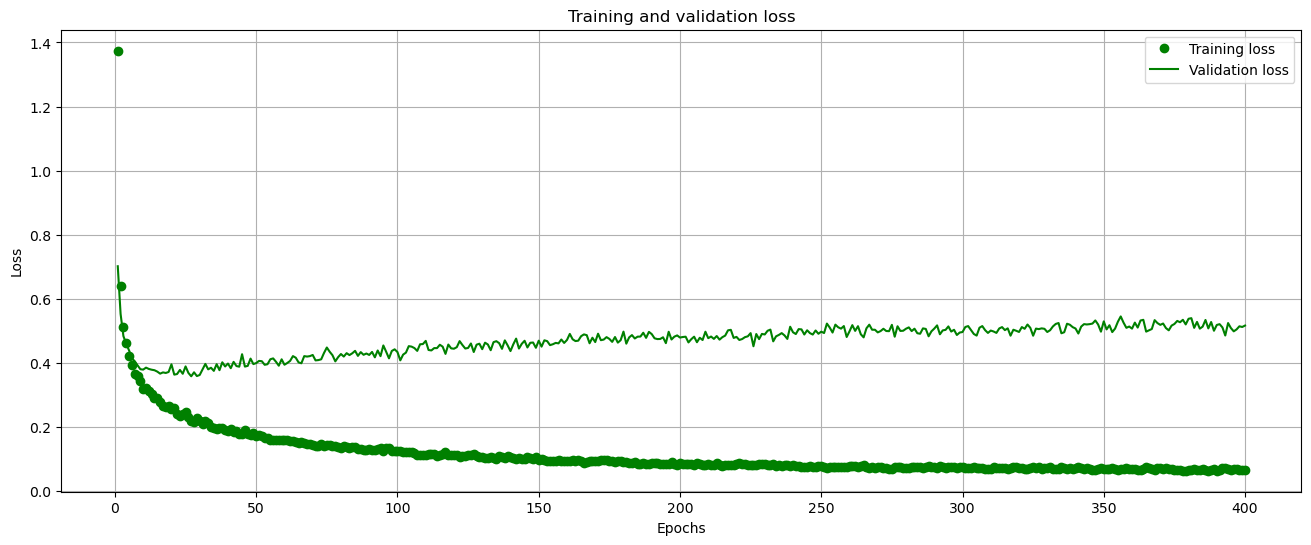

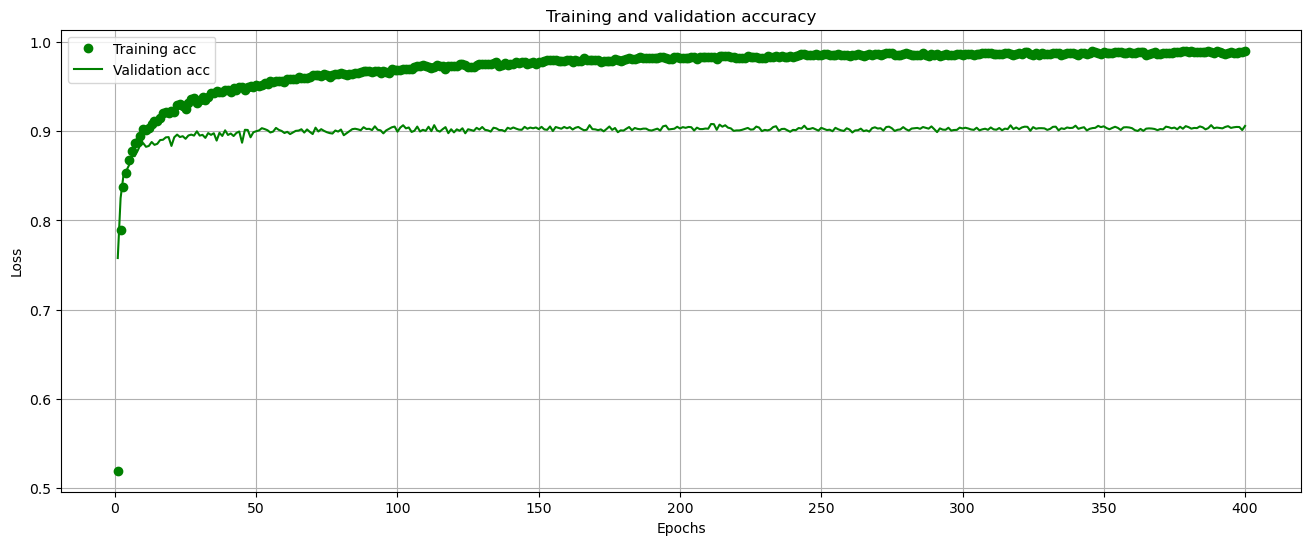

In [8]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (16, 6)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


plt.plot(epochs, history_dict['accuracy'], 'go', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()